In [20]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [21]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.plasma,
                            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [22]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1  # Fix variable name
    pn = np.empty_like(p)  # Use empty_like instead of np.asarray()

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                          dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                         (2 * (dx**2 + dy**2)))

        # Boundary Conditions
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # Ensure correct assignment
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

        # L1 norm calculation fix
        l1norm = np.sum(np.abs(p - pn)) / np.sum(np.abs(pn))

    return p  # Ensure return is outside while loop

In [23]:
## Variable declarations
nx = 31
ny = 31
dx = 2 / (nx - 1)
dy = 1 / (ny - 1)

## Initial conditions
p = np.zeros((ny, nx))  

## Plotting aids
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

## Boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

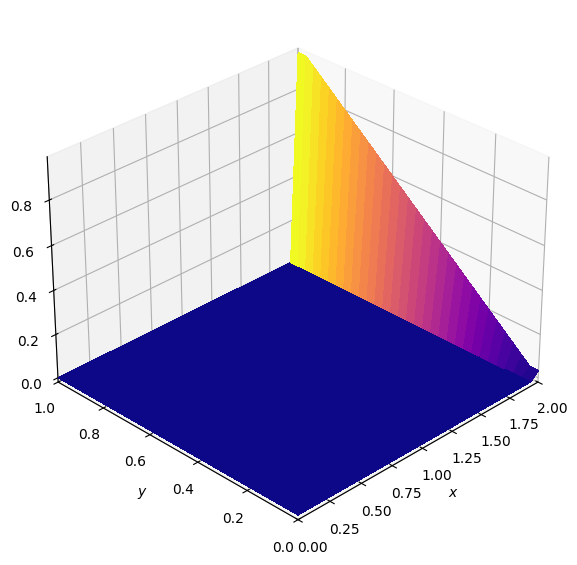

In [24]:
# Initial Plot
plot2D(x, y, p)

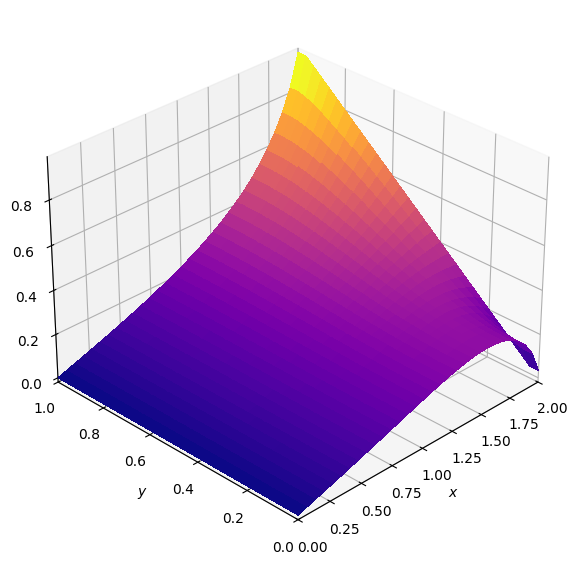

In [25]:
# Solve using Laplace equation
p = laplace2d(p, y, dx, dy, 1e-4)

# Plot final solution
plot2D(x, y, p)